# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [ ]:
from __future__ import print_function

import keras
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment.

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [ ]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Construct a validation set from the last 10000 images and labels from
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:] # Extract validation labels

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000] # Extract training labels


In [ ]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

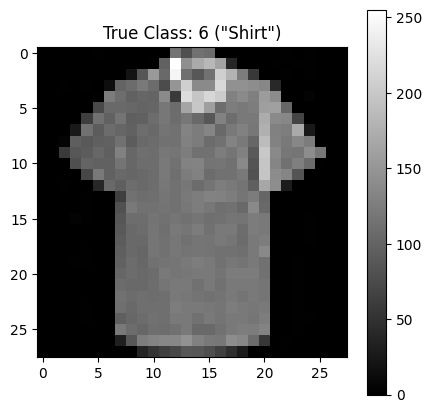

In [ ]:
plt.figure(figsize=(5,5))
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

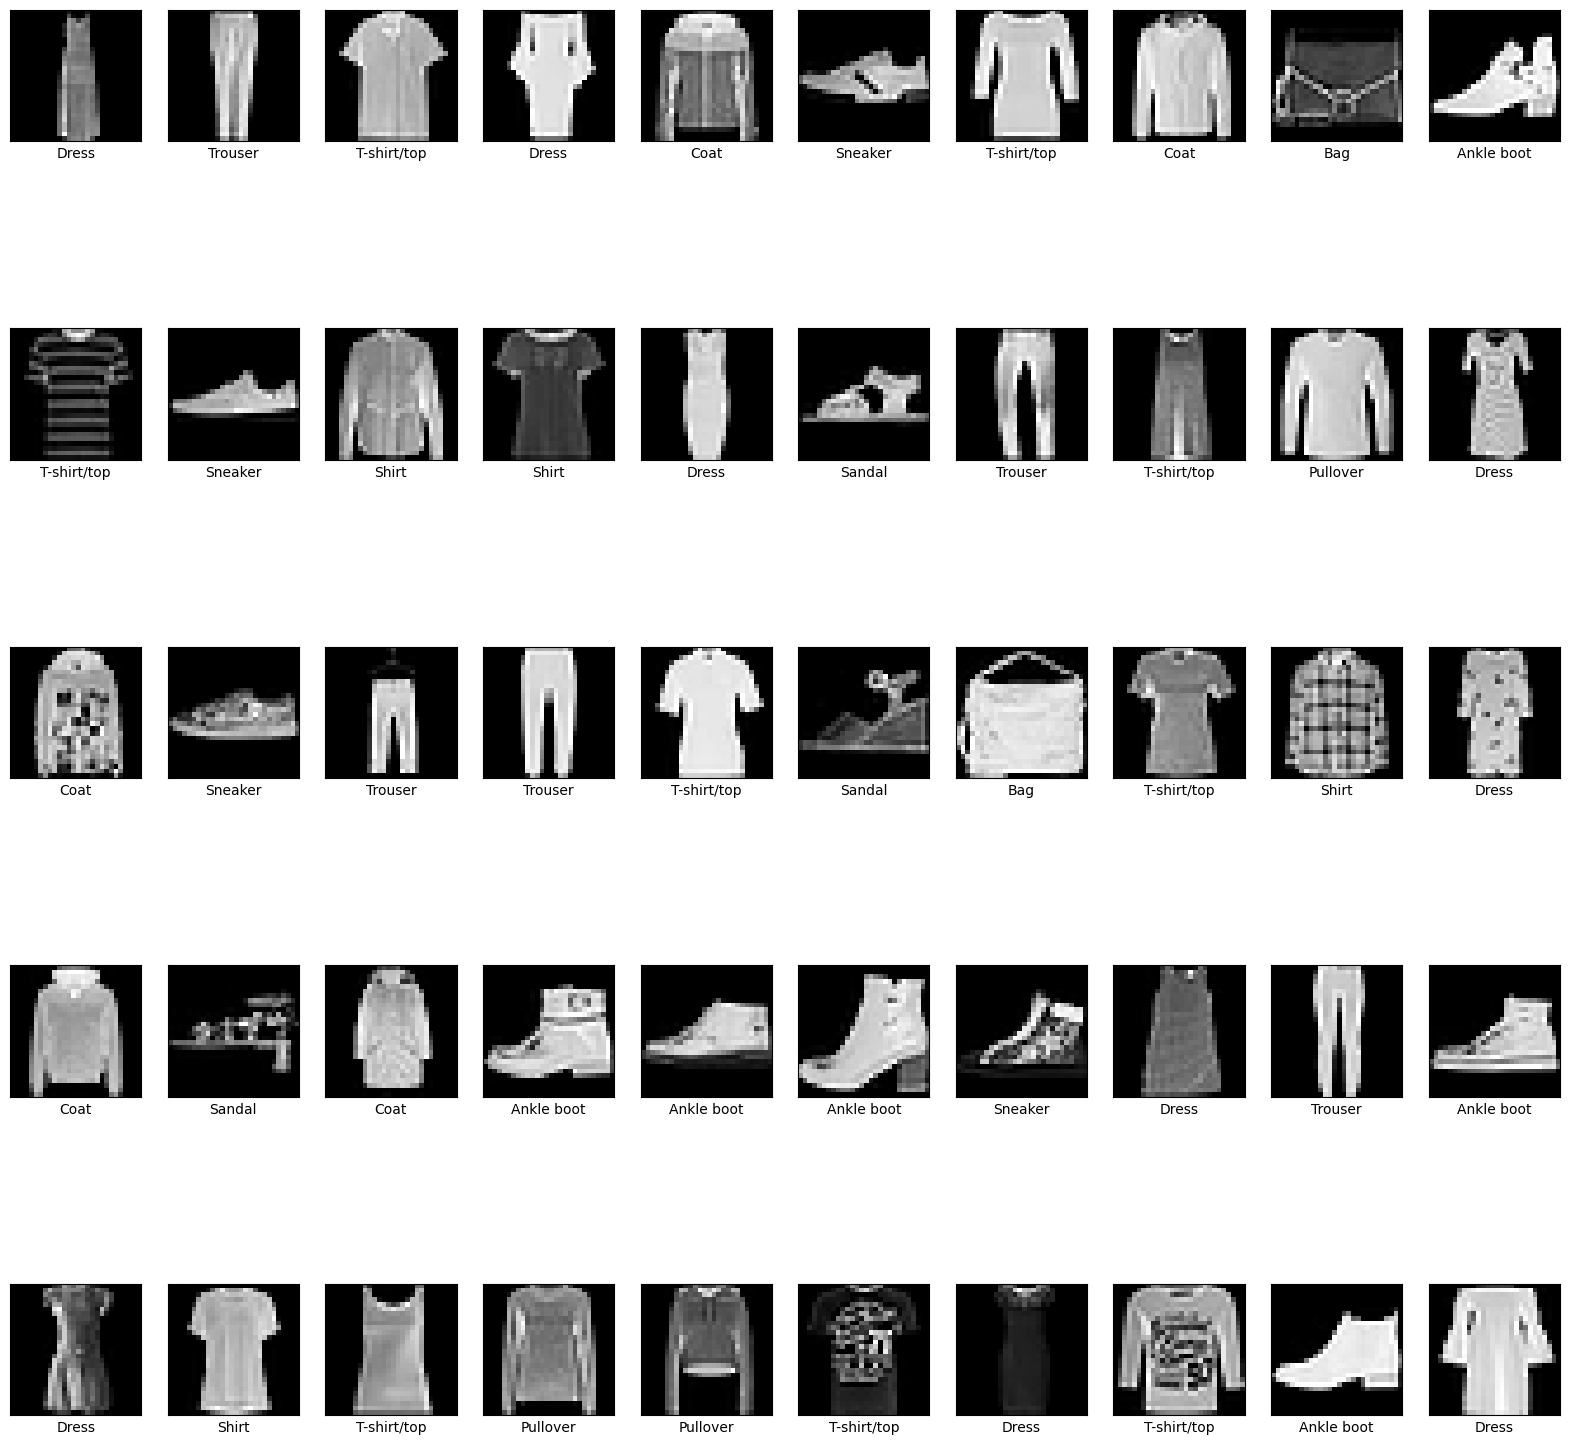

In [ ]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [ ]:
# Flatten the images
train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784) # Flatten validation images
test_images_flatten = test_images.reshape(test_images.shape[0], 784) # Flatten test images


In [ ]:
# Normalize the images
train_images_model = train_images_flatten / 255.0
validation_images_model = validation_images_flatten / 255.0  # Normalize validation images
test_images_model = test_images_flatten / 255.0  # Normalize test images


In [ ]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

# Train

In [ ]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here
model = Sequential()
# Add your desired layers here. For example:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# ... add more layers


# End Code

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
# ... your existing model definition ...

# Add a Flatten layer to convert the multi-dimensional output to a 1D vector
model.add(Flatten())

# Add a Dense layer with 10 units (for 10 classes) and softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))

# Reshape the flattened image data to the expected 28x28x1 format
train_images_model = train_images_model.reshape(-1, 28, 28, 1)
validation_images_model = validation_images_model.reshape(-1, 28, 28, 1)
test_images_model = test_images_model.reshape(-1, 28, 28, 1)

# ... rest of your code ...

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))



Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7627 - loss: 0.6907 - val_accuracy: 0.8658 - val_loss: 0.3752
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.8780 - loss: 0.3448 - val_accuracy: 0.8434 - val_loss: 0.4087
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8941 - loss: 0.2985 - val_accuracy: 0.8834 - val_loss: 0.3241
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9029 - loss: 0.2701 - val_accuracy: 0.8894 - val_loss: 0.3090
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9100 - loss: 0.2533 - val_accuracy: 0.8981 - val_loss: 0.2954
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.9174 - loss: 0.2327 - val_accuracy: 0.8961 - val_loss: 0.3000
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9210 - loss: 0.2235 - val_accuracy: 0.9045 - val_loss: 0.2817
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9255 - loss: 0.2099 - 

# Test

In [ ]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])
# You should be able to get,at least, 88% accuracy

Test accuracy: 0.900600016117096


In [ ]:
# Reshape the flattened test images to the expected format (28, 28, 1)
test_images_model = test_images_flatten.reshape(-1, 28, 28, 1)

# Now predict using the reshaped images
test_logits = model.predict(test_images_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
test_logits

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
test_predictions = np.argmax(test_logits, axis=1)


In [ ]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5])

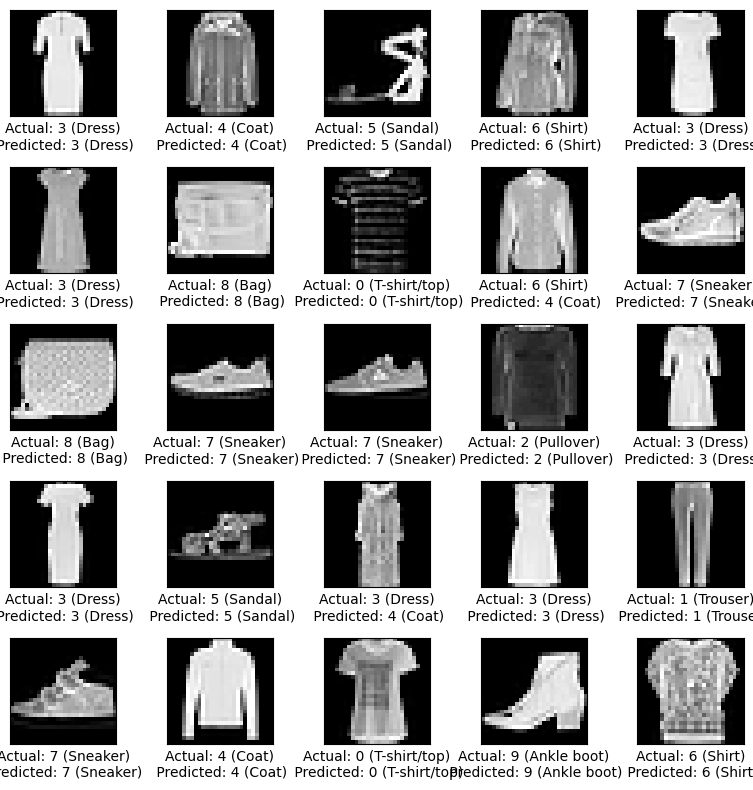

In [ ]:
plt.figure(figsize=(8,8))
for i in range(25):#25 to display a 5x5 grid of images
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)

    actual_label = test_labels[img_index] #actual label
    predicted_label = test_predictions[img_index] #predicted label

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()